In [1]:
from derive_conceptualspace.evaluate.shallow_trees import classify_shallowtree
from derive_conceptualspace.pipeline import SnakeContext, load_envfiles
from derive_conceptualspace.pipeline import cluster_loader
from derive_conceptualspace.settings import DEFAULT_N_CPUS
from derive_conceptualspace.util.desc_object import DescriptionList
from derive_conceptualspace.util.result_analysis_tools import getfiles_allconfigs
from derive_conceptualspace.util.threadworker import WorkerPool
from misc_util.logutils import setup_logging
from misc_util.pretty_print import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
setup_logging()
load_envfiles("siddata")
configs, print_cnf = getfiles_allconfigs("clusters", verbose=True)

<span style="font-size:11pt">There are 66 different parameter-combis for dataset <span style="color: #0000ff">siddata2022</span>:</span>

{'dataset': 'siddata2022',
 'debug': 'False',
 'kappa_weights': 'quadratic',
 'embed_dimensions': ['3', '50', '200'],
 'embed_algo': 'mds',
 'quantification_measure': ['ppmi', 'tfidf'],
 'translate_policy': 'onlyorig',
 'dcm_quant_measure': ['count', 'ppmi', 'tfidf'],
 'extraction_method': 'tfidf',
 'language': 'de',
 'pp_components': ['mfauhcsd2', 'mfauhtcsldp'],
 'min_words_per_desc': '80',
 'prim_lambda': '0.5',
 'sec_lambda': '0.2',
 'classifier_succmetric': ['kappa_count2rank_onlypos',
  'kappa_digitized_onlypos_2',
  'kappa_rank2rank_onlypos_min'],
 'cluster_direction_algo': 'reclassify'}

In [3]:
N_CPUS = DEFAULT_N_CPUS-1
with WorkerPool(N_CPUS, pgbar="Fetching clusters..") as pool:
    get_featureaxes = lambda conf: ((ctx := SnakeContext.loader_context(config=conf, silent=True)).get_important_settings(), ctx.load("clusters"), conf)
    perconf_list, interrupted = pool.work(configs, get_featureaxes)

Fetching clusters.. [5 procs]: 100%|██████████| 66/66 [01:52<00:00,  1.71s/it]


In [4]:
print("Number of clusters per configs:", [len(x[1]["clusters"]) for x in perconf_list])
display("Taking one of the configs with the most clusters...")
settings_str, clusters, conf = max(perconf_list, key=lambda x: len(x[1]["clusters"]))
display(settings_str[1])
display("Loading the rest of the necessary config...")
ctx, (embedding, descriptions) = (ctx := SnakeContext.loader_context(config=conf, silent=True)), ctx.load("embedding", "pp_descriptions")
display("loading done.")

Number of clusters per configs: [1, 1, 6, 6, 6, 6, 6, 6, 6, 2, 1, 6, 6, 6, 6, 6, 1, 100, 39, 2, 100, 25, 14, 100, 100, 98, 100, 100, 3, 100, 100, 3, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1, 364, 50, 1, 313, 46, 26, 179, 171, 169, 74, 264, 179, 236, 4, 400, 239, 3, 400, 245, 400, 400, 157, 400]


<span style="font-size:11pt">Taking one of the configs with the most clusters...</span>

<span style="font-size:11pt">CLASSIFIER: <span style="color: #0000ff">SVM</span>, CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, CLUSTER_DIRECTION_ALGO: <span style="color: #0000ff">reclassify</span>, DATASET: <span style="color: #ff0000">siddata2022</span>, DCM_QUANT_MEASURE: <span style="color: #0000ff">count</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">200</span>, EXTRACTION_METHOD: <span style="color: #ff0000">tfidf</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #0000ff">de</span>, MIN_WORDS_PER_DESC: <span style="color: #ff0000">80</span>, PP_COMPONENTS: <span style="color: #ff0000">mfauhcsd2</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, SEC_LAMBDA: <span style="color: #ff0000">0.2</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

<span style="font-size:11pt">Loading the rest of the necessary config...</span>

<span style="font-size:11pt">loading done.</span>

# Classifying Fachbereich

Dropping 4520/11601 (38.96%) courses - there is no Fachbereich for them
63 courses are assigned more than 1 Fachbereich!


derive_conceptualspace/load_data/dataset_specifics/siddata2022.py:43: UserWarning: Will return the first Fachbereich for those ambiguous courses!


<span style="font-size:11pt">Using classes from fachbereich - 7081/11601 entities have a class</span>

<span style="font-size:11pt">Highest-ranking descriptions [with any class] per dimension:<br>    <span style="color: #0000ff">bibliotheken          </span>: Tutorium Orientierungsseminar (Gruppe I)<br>    <span style="color: #0000ff">verdeutlichen         </span>: Konzeptionen, Geschichte und Inhalte des Sachunterrichts (G1)<br>    <span style="color: #0000ff">opnv                  </span>: Tagesexkursion Agri-Food Cluster in Nord-West Niedersachsen<br>    <span style="color: #0000ff">schriftliche mundliche</span>: Kolloquium für Examenskandidaten<br>    <span style="color: #0000ff">blockveranstaltungen  </span>: Begleitung und Betreuung des Fachpraktikums Englisch im Herbst 2008<br>    <span style="color: #0000ff">schwierige            </span>: 1.14 Veränderungsmanagement im Prüfungswesen - Gelungene Kommunikation - auch in schwierigen Situationen<br>    <span style="color: #0000ff">erde                  </span>: Tutorium zur Vorlesung: System Lebewesen/Ökozonen<br>    <span style="color: #0000ff">bertolt brecht        </span>: Bertolt Brecht - Dramatische Arbeit (NDL 3)<br>    <span style="color: #0000ff">religionswissenschaft </span>: Friedrich Schleiermacher, Über die Religion: Reden an die Gebildeten unter ihren Verächtern<br>    <span style="color: #0000ff">vi                    </span>: AG Wissensbasierte Robotik<br>    <span style="color: #0000ff">erkrankungen          </span>: Verhaltensmedizin<br>    <span style="color: #0000ff">gesammelt             </span>: Bauen und Konstruieren als Thema im Sachunterricht (G2,3/H1,2,3,5)<br>    <span style="color: #0000ff">mitarbeiterinnen      </span>: 1.2 Arbeitsplatz Universität: Einführung für neue Mitarbeiterinnen und Mitarbeiter aber auch für andere Interessierte<br>    <span style="color: #0000ff">bietet uberblick      </span>: Einführung in die Sozialpsychologie (V)<br>    <span style="color: #0000ff">lineare               </span>: Datenanalyse I<br>    <span style="color: #0000ff">verhaltens            </span>: Praxiswerkstatt Klinische Psychologie: Einführung in die Positive Psychologie Beratung<br>    <span style="color: #0000ff">weist                 </span>: Grundlehre Performance<br>    <span style="color: #0000ff">parteien              </span>: Modul Vergleichende Politikwissenschaft I: Westliche Regierungssysteme im Vergleich<br>    <span style="color: #0000ff">aktivitaten           </span>: Projektmanagement (Teil des Seminars 2.119)<br>    <span style="color: #0000ff">texte verfassen       </span>: Gender !? - Einstieg in die Geschlechterforschung</span>

<span style="font-size:11pt">Labels (10 classes): <span style="color: #0000ff">Sprach-/Literaturwissenschaften</span>: 1663, <span style="color: #0000ff">Erziehungs-/Kulturwissenschaften</span>: 1998, <span style="color: #0000ff">Kultur-/Geowissenschaften</span>: 1439, <span style="color: #0000ff">Sozialwissenschaften</span>: 706, <span style="color: #0000ff">Rechtswissenschaften</span>: 333, <span style="color: #0000ff">Humanwissenschaften</span>: 366, <span style="color: #0000ff">Biologie/Chemie</span>: 158, <span style="color: #0000ff">Mathematik/Informatik</span>: 180, <span style="color: #0000ff">Physik</span>: 134, <span style="color: #0000ff">Wirtschaftswissenschaften</span>: 104</span>

<span style="font-size:11pt">Eval-Settings: type: <span style="color: #0000ff">one-vs-rest</span>, DT-Depth: <span style="color: #0000ff">1</span>, train-test-split:<span style="color: #0000ff"> 33.0% in test-set </span></span>

Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.


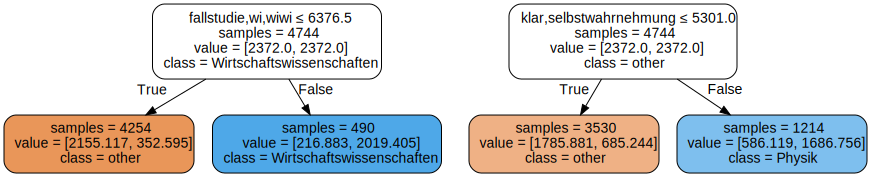

<span style="font-size:11pt"><br><br></span>

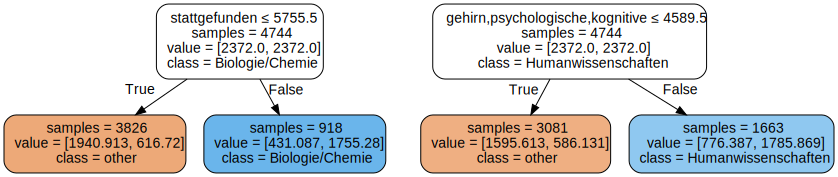

<span style="font-size:11pt"><br><br></span>

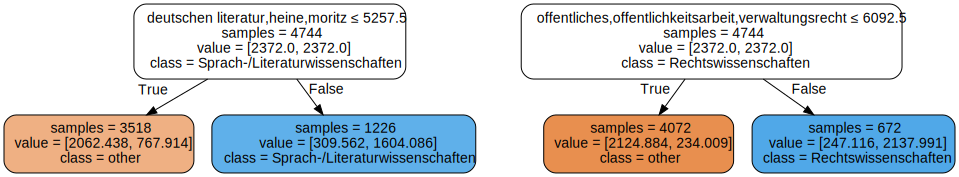

<span style="font-size:11pt"><br><br></span>

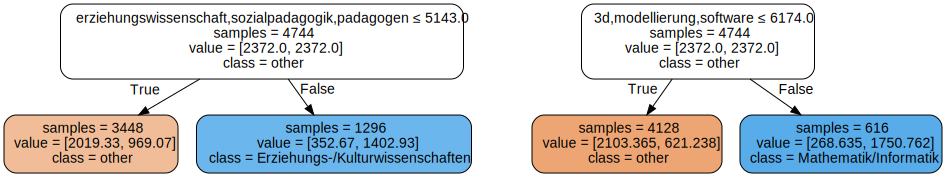

<span style="font-size:11pt"><br><br></span>

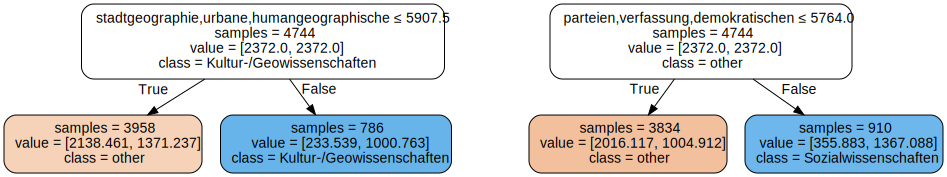

<span style="font-size:11pt"><br><br></span>

<span style="font-size:11pt">Per-Class-Scores: Wirtschaftswissenschaften: 0.92, Physik: 0.77, Biologie/Chemie: 0.83, Humanwissenschaften: 0.67, Sprach-/Literaturwissenschaften: 0.84, Rechtswissenschaften: 0.90, Erziehungs-/Kulturwissenschaften: 0.79, Mathematik/Informatik: 0.89, Kultur-/Geowissenschaften: 0.81, Sozialwissenschaften: 0.83</span>

<span style="font-size:11pt">Unweighted Mean Accuracy: 82.41%</span>

<span style="font-size:11pt">Weighted Mean Accuracy: 81.37%</span>

In [5]:
# res = classify_shallowtree_multi(clusters, embedding, descriptions, ctx.obj["dataset_class"], verbose=True)
res = classify_shallowtree(clusters, embedding, descriptions, ctx.obj["dataset_class"], one_vs_rest=True, dt_depth=1, test_percentage_crossval=0.33, 
                           classes="fachbereich", verbose=True, return_features=False, balance_classes=True, do_plot=True)

<br><br><br><br><br><br><br><br>

# Classifying DDC

Dropping 6507/11601 (56.09%) courses - there is no DDC for them
14 courses have multiple differing DDCs at this level!


derive_conceptualspace/load_data/dataset_specifics/siddata2022.py:52: UserWarning: Will return the first DDC for those ambiguous courses!


<span style="font-size:11pt">Using classes from ddc_l1 - 5094/11601 entities have a class</span>

<span style="font-size:11pt">Highest-ranking descriptions [with any class] per dimension:<br>    <span style="color: #0000ff">bibliotheken          </span>: TUTORIUM: Einführung in die französische Kulturwissenschaft<br>    <span style="color: #0000ff">verdeutlichen         </span>: Entwicklung von Kindern und Jugendlichen unter erschwerenden Bedingungen – Betrachtung im Kontext Schule<br>    <span style="color: #0000ff">opnv                  </span>: Global Day of Coderetreat, alternativer Übungstermin zur Übung am 06.11.2020<br>    <span style="color: #0000ff">schriftliche mundliche</span>: HannES Probeexamen<br>    <span style="color: #0000ff">blockveranstaltungen  </span>: Einführung in das Studium der Geschichte<br>    <span style="color: #0000ff">schwierige            </span>: ZQS/SK: Stimm- und Sprechtraining<br>    <span style="color: #0000ff">erde                  </span>: Vorlesung: System "Lebewesen & Ökozonen"<br>    <span style="color: #0000ff">bertolt brecht        </span>: Einführung in die neuere deutsche Literaturwissenschaft am Beispiel Gotthold Ephraim Lessings [NDL1B]<br>    <span style="color: #0000ff">religionswissenschaft </span>: Säkularisierung, Individualisierung oder öffentliche Religion? Zum Verhältnis von Religion und Moderne (Online-Kurs)<br>    <span style="color: #0000ff">vi                    </span>: Recht des Geistigen Eigentums, ab 5. Sem. Dipl. WPF SP 3<br>    <span style="color: #0000ff">erkrankungen          </span>: Gesundheit und Krankheit als gesellschaftliche Konstruktionen? Zum soziologischen Verständnis von Gesundheit und Krankheit<br>    <span style="color: #0000ff">gesammelt             </span>: Kinder als Erfinder - ein Tag in der Welt der Wissenschaften B.2 (1)<br>    <span style="color: #0000ff">mitarbeiterinnen      </span>: 1.1 Arbeitsplatz Universität - Einführung für neue Beschäftigte und andere Interessierte<br>    <span style="color: #0000ff">bietet uberblick      </span>: Einführung in die Sozialpsychologie (V)<br>    <span style="color: #0000ff">lineare               </span>: Hackathon „Mobile Robotik“<br>    <span style="color: #0000ff">verhaltens            </span>: Ausgewählte Experimente der Psychologie<br>    <span style="color: #0000ff">weist                 </span>: digital: Aufräumen! Tätig sein!<br>    <span style="color: #0000ff">parteien              </span>: Interessengruppenpolitik aus vergleichender Perspektive: Strukturen, Handeln und Konsequenzen<br>    <span style="color: #0000ff">aktivitaten           </span>: Finanzpolitik in der Demokratie [Präsenz]<br>    <span style="color: #0000ff">texte verfassen       </span>: Konstruiert, intersektional, queer? - Perspektiven, Konzepte und Themefelder sozialwissenschaftlicher Gender Studies</span>

<span style="font-size:11pt">Labels (10 classes): <span style="color: #0000ff">Social sciences</span>: 1938, <span style="color: #0000ff">History and geography</span>: 220, <span style="color: #0000ff">Pure Science</span>: 254, <span style="color: #0000ff">Literature</span>: 356, <span style="color: #0000ff">Arts and recreation</span>: 412, <span style="color: #0000ff">Technology</span>: 678, <span style="color: #0000ff">Religion</span>: 229, <span style="color: #0000ff">Computer science, information, general</span>: 323, <span style="color: #0000ff">Language</span>: 430, <span style="color: #0000ff">Philosophy and psychology</span>: 254</span>

<span style="font-size:11pt">Eval-Settings: type: <span style="color: #0000ff">one-vs-rest</span>, DT-Depth: <span style="color: #0000ff">1</span>, train-test-split:<span style="color: #0000ff"> 33.0% in test-set </span></span>

Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.


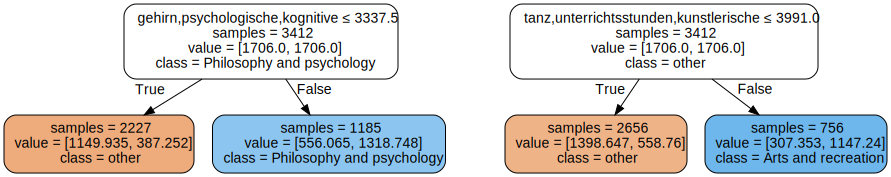

<span style="font-size:11pt"><br><br></span>

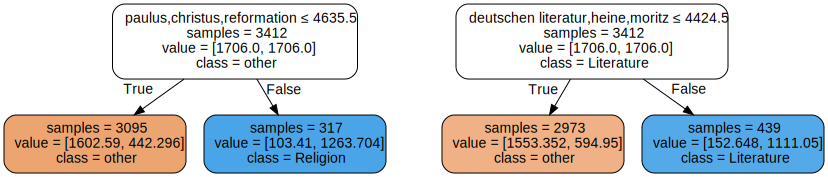

<span style="font-size:11pt"><br><br></span>

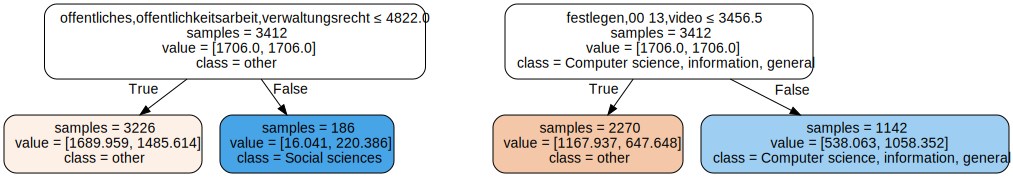

<span style="font-size:11pt"><br><br></span>

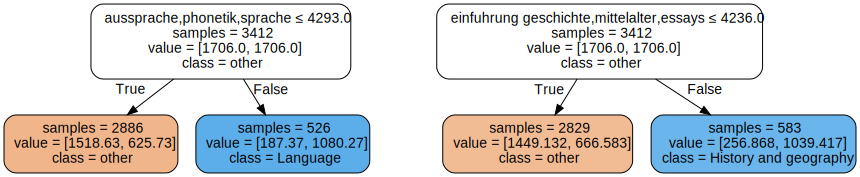

<span style="font-size:11pt"><br><br></span>

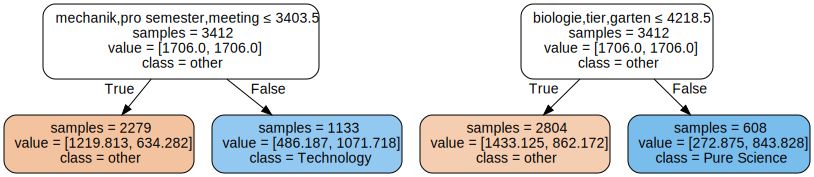

<span style="font-size:11pt"><br><br></span>

<span style="font-size:11pt">Per-Class-Scores: Philosophy and psychology: 0.68, Arts and recreation: 0.81, Religion: 0.93, Literature: 0.88, Social sciences: 0.65, Computer science, information, general: 0.70, Language: 0.87, History and geography: 0.85, Technology: 0.69, Pure Science: 0.85</span>

<span style="font-size:11pt">Unweighted Mean Accuracy: 78.98%</span>

<span style="font-size:11pt">Weighted Mean Accuracy: 73.90%</span>

In [6]:
res = classify_shallowtree(clusters, embedding, descriptions, ctx.obj["dataset_class"], one_vs_rest=True, dt_depth=1, test_percentage_crossval=0.33, 
                           classes="ddc_l1", verbose=True, return_features=False, balance_classes=True, do_plot=True)

## Another one, cause the other also looked good

<span style="font-size:11pt">Running with the following settings [<span style="color: #ff00ff">e2a70a9bf2</span>]: CLASSIFIER: <span style="color: #0000ff">SVM</span>, CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, CLUSTER_DIRECTION_ALGO: <span style="color: #0000ff">reclassify</span>, DATASET: <span style="color: #ff0000">siddata2022</span>, DCM_QUANT_MEASURE: <span style="color: #0000ff">count</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">200</span>, EXTRACTION_METHOD: <span style="color: #ff0000">tfidf</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #0000ff">de</span>, MIN_WORDS_PER_DESC: <span style="color: #ff0000">80</span>, PP_COMPONENTS: <span style="color: #ff0000">mfauhtcsldp</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, SEC_LAMBDA: <span style="color: #ff0000">0.2</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

Dropping 6743/11942 (56.46%) courses - there is no DDC for them
14 courses have multiple differing DDCs at this level!


derive_conceptualspace/load_data/dataset_specifics/siddata2022.py:52: UserWarning: Will return the first DDC for those ambiguous courses!


<span style="font-size:11pt">Using classes from ddc_l1 - 5199/11942 entities have a class</span>

<span style="font-size:11pt">Highest-ranking descriptions [with any class] per dimension:<br>    <span style="color: #0000ff">daran anschliessend    </span>: Was ist der Mensch? Die Anthropologie Karl Barths (Annika Kretschmann)<br>    <span style="color: #0000ff">bewerber               </span>: Online! Berufseinstieg für Kultur- und Sprachwissenschaftler*innen<br>    <span style="color: #0000ff">formel                 </span>: Lineare Algebra I (MP)<br>    <span style="color: #0000ff">800                    </span>: Deutsche Literatur im Mittelalter (FN/ÄDL1B)<br>    <span style="color: #0000ff">sprache                </span>: Sprache als Werkzeug des Lernens<br>    <span style="color: #0000ff">turnen                 </span>: Interdisziplinäre Ringvorlesung ´Der Atlantik als historischer Raum´<br>    <span style="color: #0000ff">2021 16                </span>: Begleitseminar zum Praxissemester<br>    <span style="color: #0000ff">kologisch              </span>: OL_Kälteanlagen und Wärmepumpen<br>    <span style="color: #0000ff">programmiersprache     </span>: Hackathon „Mobile Robotik“<br>    <span style="color: #0000ff">audiovisuell           </span>: Sprache in Medien B (GER-SSS) (Do 10-12)<br>    <span style="color: #0000ff">anrechenbar            </span>: Citavi: Schulung für Studierende aller Fachbereiche am 8. Oktober 2020<br>    <span style="color: #0000ff">arbeitsaufgabe         </span>: Sitzung 6: Das System der Konzentrationslager: KZ-Dokumente, Geschichte und Funktion einzelner Lager<br>    <span style="color: #0000ff">einfuhrung allgemein   </span>: Fat Studies<br>    <span style="color: #0000ff">kommunikationsstrategie</span>: Sitzung 1: Einführung, Organisatorisches und virtuelles Kennenlernen/Wiedersehen<br>    <span style="color: #0000ff">gebet                  </span>: Collegium musicum<br>    <span style="color: #0000ff">erfindung              </span>: Einführung in die philosophische Ästhetik<br>    <span style="color: #0000ff">aktivierung studierend </span>: Grundkurs Spanisch II (Grupo A)<br>    <span style="color: #0000ff">madchen                </span>: Jugend und Übergänge<br>    <span style="color: #0000ff">au szlig erde          </span>: Vorlesung: System Lebewesen & Ökozonen<br>    <span style="color: #0000ff">mitbestimmung          </span>: Recht der Unternehmensmitbestimmung, ab 5. Sem. Dipl. WPF SP 2 u. 6. Sem. LL.B. PB 3 (nur 2. Semesterhälfte)</span>

<span style="font-size:11pt">Labels (10 classes): <span style="color: #0000ff">Social sciences</span>: 1986, <span style="color: #0000ff">History and geography</span>: 225, <span style="color: #0000ff">Pure Science</span>: 265, <span style="color: #0000ff">Literature</span>: 362, <span style="color: #0000ff">Arts and recreation</span>: 424, <span style="color: #0000ff">Technology</span>: 672, <span style="color: #0000ff">Religion</span>: 235, <span style="color: #0000ff">Computer science, information, general</span>: 319, <span style="color: #0000ff">Language</span>: 452, <span style="color: #0000ff">Philosophy and psychology</span>: 259</span>

<span style="font-size:11pt">Eval-Settings: type: <span style="color: #0000ff">one-vs-rest</span>, DT-Depth: <span style="color: #0000ff">1</span>, train-test-split:<span style="color: #0000ff"> 33.0% in test-set </span></span>

Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.


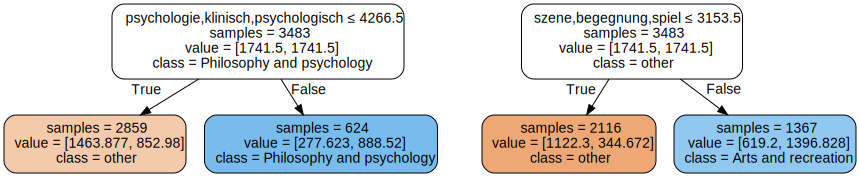

<span style="font-size:11pt"><br><br></span>

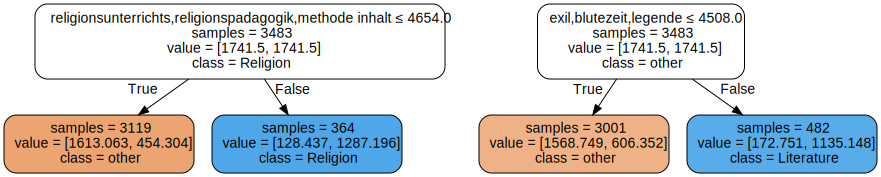

<span style="font-size:11pt"><br><br></span>

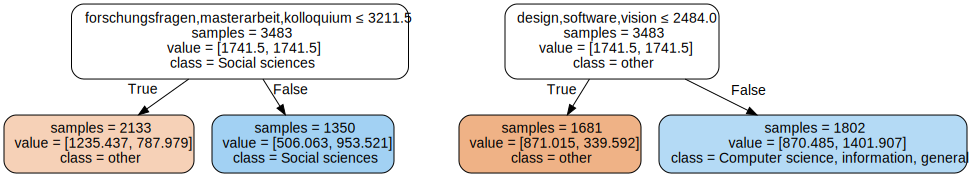

<span style="font-size:11pt"><br><br></span>

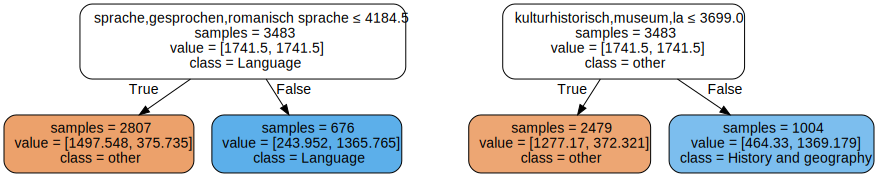

<span style="font-size:11pt"><br><br></span>

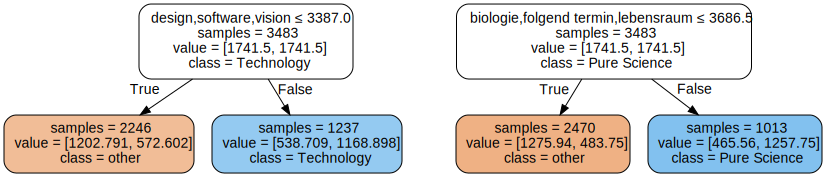

<span style="font-size:11pt"><br><br></span>

<span style="font-size:11pt">Per-Class-Scores: Philosophy and psychology: 0.81, Arts and recreation: 0.65, Religion: 0.91, Literature: 0.90, Social sciences: 0.65, Computer science, information, general: 0.50, Language: 0.86, History and geography: 0.73, Technology: 0.69, Pure Science: 0.73</span>

<span style="font-size:11pt">Unweighted Mean Accuracy: 74.20%</span>

<span style="font-size:11pt">Weighted Mean Accuracy: 70.65%</span>

In [7]:
conf = {'dataset': 'siddata2022', 'debug': False, 'kappa_weights': 'quadratic', 'embed_dimensions': 200, 'embed_algo': 'mds', 'quantification_measure': 'tfidf', 'dcm_quant_measure': 'count', 'extraction_method': 'tfidf', 'translate_policy': 'onlyorig', 'pp_components': 'mfauhtcsldp', 'language': 'de', 'min_words_per_desc': 80, 'prim_lambda': 0.5, 'sec_lambda': 0.2, 'classifier_succmetric': 'kappa_digitized_onlypos_2', 'cluster_direction_algo': 'reclassify'}
ctx = SnakeContext.loader_context(config=conf, silent=True)
ctx.print_important_settings()
clusters, embedding, descriptions = ctx.load("clusters", "embedding", "pp_descriptions")

res = classify_shallowtree(clusters, embedding, descriptions, ctx.obj["dataset_class"], one_vs_rest=True, dt_depth=1, test_percentage_crossval=0.33,
                           classes="ddc_l1", verbose=True, return_features=False, balance_classes=True, do_plot=True)